(acoustics-receiver_time_series)=
# How do acoustic signals look/sound like?

In previous sections, we talk about RL and sound captured by hydrophone as a single value. However, from our day-to-day experience, we know that different sounds have different durations, but are almost never a single time point. Indeed, the voltage **time series** is how sound signals captured by a hydrophone actually looks like.

For example, below is a recording of a sonar transmission received on a moored hydrophone, along with cable drumming and sound from something else we can't quite tell. One can usually get a basic understanding of the signal by looking its **time series** (what a hydrophone actually captures) and **spectrogram**, and listening to it. 

```{Exercise}
:class: admonition
Looking at the figures below, can you see associate the temporal and spectral features you see with the sound you hear?
```

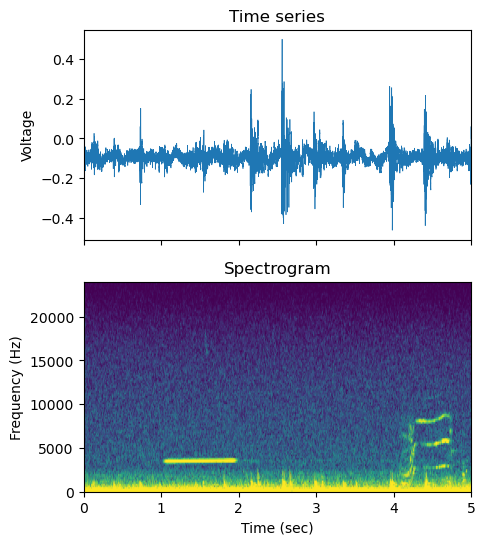

In [1]:
import scipy.io.wavfile as wavfile
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd


wav_fname = "../resources/rxm_5069_ping_220730185129_ch1.wav"
fs, sig = wavfile.read(wav_fname)
sig_time = np.arange(sig.size)/fs

fig , ax = plt.subplots(2, 1, figsize=(5, 6), sharex=True)
ax[0].plot(sig_time, sig/2**16, lw=0.5)
ax[0].set_title("Time series")
ax[0].set_ylabel("Voltage")

S, freq_vec, time_vec, im = ax[1].specgram(sig, NFFT=256, Fs=fs, vmin=-10, vmax=20)
ax[1].set_title("Spectrogram")
ax[1].set_xlabel("Time (sec)")
ax[1].set_ylabel("Frequency (Hz)")
ax[1].set_xlim(0, sig_time[-1])
plt.show()

ipd.Audio(wav_fname)

:::{tip}
Spectrogram is a convenient way to visualizing how the frequency content of the signal changes across time. Check out the [](time-frequency-analysis) page to see how spectrograms are calcaulted if you are not already familiar with it.
:::

(acoustics-receiver_sine_wave)=
## Simple sinusoidal wave

The simplest type of sound signal is a sinusoidal wave (a "sine wave"), defined by its frequency $f$ (or its period $T=1/f$) and amplitude $A$:

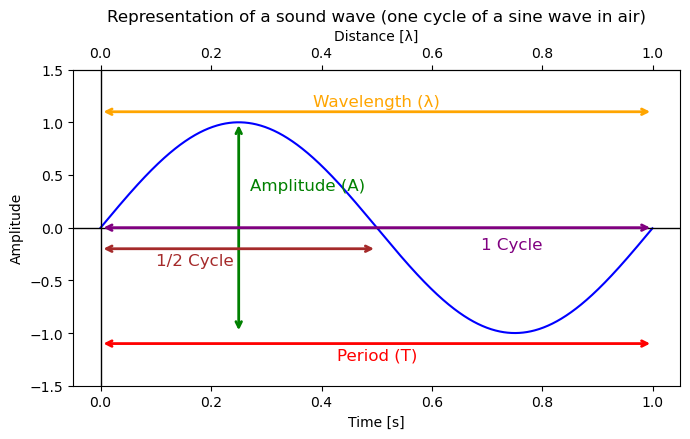

In [2]:
# Define sine wave parameters
A = 1         # Amplitude
f = 1         # Frequency in Hz (1 cycle per second)
T = 1 / f     # Period (seconds per cycle)
λ = T         # Wavelength (assuming speed of wave = 1 unit/s)

# Time vector for one cycle
t = np.arange(0, T, 1/1000)
y = A * np.sin(2 * np.pi * f * t)

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 4.5))

# Time domain plot
ax.plot(t, y, 'b', label=r'$y(t) = A \sin(2\pi ft)$')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude')
ax.set_title('Representation of a sound wave (one cycle of a sine wave in air)')

# Add secondary x-axis for distance
secax = ax.secondary_xaxis('top', functions=(lambda x: x / λ, lambda x: x * λ))
secax.set_xlabel('Distance [λ]')

# Adjust y-limits to make space for annotations
ax.set_ylim(-1.5, 1.5)

# --- Annotations ---

# Amplitude annotation (Vertical arrow from -A to A)
ax.annotate('', xy=(T/4, A), xytext=(T/4, -A), 
            arrowprops=dict(arrowstyle='<->', color='green', lw=2))
ax.text(T/4 + 0.02, 0.4, 'Amplitude (A)', color='green', fontsize=12, va='center')

# Period annotation (Horizontal arrow BELOW the x-axis)
ax.annotate('', xy=(0, -1.1), xytext=(T, -1.1), 
            arrowprops=dict(arrowstyle='<->', color='red', lw=2))
ax.text(T/2, -1.25, 'Period (T)', color='red', fontsize=12, ha='center')

# Wavelength annotation (Horizontal arrow ABOVE the upper x-axis)
ax.annotate('', xy=(0, 1.1), xytext=(λ, 1.1), 
            arrowprops=dict(arrowstyle='<->', color='orange', lw=2))
ax.text(λ/2, 1.15, 'Wavelength (λ)', color='orange', fontsize=12, ha='center')

# 1-cycle annotation (Horizontal arrow BELOW the period annotation)
ax.annotate('', xy=(0, 0), xytext=(T, 0), 
            arrowprops=dict(arrowstyle='<->', color='purple', lw=2))
ax.text(0.8, -0.2, '1 Cycle', color='purple', fontsize=12, ha='right')

# Half-cycle annotation (Horizontal arrow BELOW the 1-cycle annotation)
ax.annotate('', xy=(0, -0.2), xytext=(T/2, -0.2), 
            arrowprops=dict(arrowstyle='<->', color='brown', lw=2))
ax.text(0.1, -0.35, '1/2 Cycle', color='brown', fontsize=12, ha='left')

# Formatting
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

**Figure credit: [Audio Signal Processing Concepts Explained with Python](https://francescopapaleo.github.io/audio-signal-processing/notebooks/sound_waves.html).**

(acoustics-receiver_phase)=
## Phase

Another important concept is **phase**, which describes where in a sine wave a certain point is. We can understand phase intuitively by relating the signal with a revolving point on a unit circle as shown in the widget below.

In [3]:
import ipywidgets as widgets
import matplotlib.gridspec as gridspec

def plot_wave_and_circle(x_val):
    x = np.arange(3601)/3600 * 2
    y = np.sin(np.pi*x)
    y_val = np.sin(np.pi*x_val)

    circ_x_val = np.cos(np.pi*x_val)
    circ_y_val = np.sin(np.pi*x_val)


    fig = plt.figure(figsize=(8, 3))
    gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])

    # Sine wave
    ax0 = fig.add_subplot(gs[0])
    
    ax0.plot(x, y, label='y = sin(x)')
    ax0.plot([x_val], [y_val], 'ro')                 # point on sine wave
    ax0.axvline(x_val, color='gray', linestyle='--')
    ax0.axhline(y_val, color='gray', linestyle='--')
    ax0.set_title('Sine Wave')
    ax0.set_xlim(0, 2)
    ax0.set_ylim(-1.1, 1.1)
    ax0.set_xlabel('x')
    ax0.set_ylabel('y')
    ax0.set_yticks(np.arange(-1, 1.1, 0.5))
    ax0.grid(True)

    # Unit circle
    ax1 = fig.add_subplot(gs[1], sharey=ax0)
    circle = plt.Circle((0, 0), 1, fill=False, zorder=2)
    ax1.add_artist(circle)
    ax1.plot([0, circ_x_val], [0, circ_y_val], 'r-')  # radius line
    ax1.plot(circ_x_val, circ_y_val, 'ro')        # point on unit circle
    ax1.set_title('Unit Circle')
    ax1.set_xlim(-1.1, 1.1)
    ax1.set_ylim(-1.1, 1.1)
    ax1.set_yticks(np.arange(-1, 1.1, 0.5))
    ax1.set_aspect('equal')
    ax1.grid(True)
    ax1.set_xticks([-1, 0, 1])

    plt.tight_layout()
    plt.show()

    text_box.value = f"{x_val / 2 * 360:6.2f}"

text_box = widgets.Text(value=f"{0:6.2f}", description='Phase (degree)', style={'description_width': 'initial'})

display(text_box)
widgets.interact(
    plot_wave_and_circle,
    x_val=widgets.FloatSlider(
        min=0, max=2, step=0.01, value=0, description='x'
    )
)


Text(value='  0.00', description='Phase (degree)', style=TextStyle(description_width='initial'))

interactive(children=(FloatSlider(value=0.0, description='x', max=2.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.plot_wave_and_circle(x_val)>

:::{admonition} Exercise
Using this widget, where are you in the wave when you are at a phase angle of 135 degree?
:::

```{Note}
:class: note
The concept of phase is key to understand constructive and destructive interference when waves are added together (superposition), which gives rise to the important topic of **directionality** as we shall see in [](acoustics-receiver_time_series).
```

(acoustics-receiver_phase_frequency)=
## Relationship with frequency

For a sine wave propagating in a medium of sound speed $c$, its wavelength $\lambda$ is related to its frequency by

$$
c = f \times \lambda
$$

We will run into this over and over again in the tutorials, so let's get an intuitive feel of how $f$ and $\lambda$ form an inverse relationship with each other, and how these relate to phase changes:

In [4]:
def plot_wave_freq(freq, amplitude, x_val):

    x = np.linspace(0, 0.5, 1000)
    y = amplitude * np.sin(2*np.pi*freq*x)

    y_val = amplitude * np.sin(2*np.pi*freq*x_val)  # position on wave

    period = 1/freq
    circ_x_val = np.cos(x_val%period/period * 2*np.pi)
    circ_y_val = np.sin(x_val%period/period * 2*np.pi)

    
    fig = plt.figure(figsize=(8, 3))
    gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])

    # Sine wave
    ax0 = fig.add_subplot(gs[0])
    
    ax0.plot(x, y, label='y = sin(x)')
    ax0.plot(x_val, y_val, 'ro')                 # point on sine wave
    ax0.axvline(x_val, color='gray', linestyle='--')
    ax0.axhline(y_val, color='gray', linestyle='--')
    ax0.set_title('Sine Wave')
    ax0.set_xlim(0, 0.5)
    ax0.set_ylim(-1.1, 1.1)
    ax0.set_xlabel('x')
    ax0.set_ylabel('y')
    ax0.set_yticks(np.arange(-1, 1.1, 0.5))
    ax0.grid(True)

    # Unit circle
    ax1 = fig.add_subplot(gs[1], sharey=ax0)
    circle = plt.Circle((0, 0), 1, fill=False, zorder=2)
    ax1.add_artist(circle)
    ax1.plot([0, circ_x_val], [0, circ_y_val], 'r-')  # radius line
    ax1.plot(circ_x_val, circ_y_val, 'ro')        # point on unit circle
    ax1.set_title('Unit Circle')
    ax1.set_xlim(-1.1, 1.1)
    ax1.set_ylim(-1.1, 1.1)
    ax1.set_yticks(np.arange(-1, 1.1, 0.5))
    ax1.set_aspect('equal')
    ax1.grid(True)
    ax1.set_xticks([-1, 0, 1])

    plt.tight_layout()

widgets.interact(
    plot_wave_freq,
    freq=widgets.IntSlider(
        value=10,
        min=5,
        max=30,
        step=1,
        description="Frequency (Hz)",
        continuous_update=True,
        style={'description_width': 'initial'},
        layout=widgets.Layout(width="400px")
    ),
    amplitude=widgets.FloatSlider(
        value=1,
        min=0.5,
        max=1.5,
        step=0.05,
        description="Amplitude (Volt)",
        continuous_update=True,
        style={'description_width': 'initial'},
        layout=widgets.Layout(width="400px")
    ), 
    x_val=widgets.FloatSlider(
        min=0, max=0.5, step=0.0001, value=0, description='x', readout=True, readout_format='.3f',
    )
)


interactive(children=(IntSlider(value=10, description='Frequency (Hz)', layout=Layout(width='400px'), max=30, …

<function __main__.plot_wave_freq(freq, amplitude, x_val)>

:::{admonition} Exercise
:class: admonition
Based on what you have observed in the widget above, how does the phase of a wave change (faster or slower) within the same time interval when the frequency increases?
:::

:::{tip}
See the [](primer_signal-types) primer page to see other common signal types in addition to the sine wave.
:::